# Morphology Tutorial

Mathematical morphology (MM) is a theoretical model for digital images built upon lattice theory and topology. It is the foundation of morphological image processing, which is based on shift-invariant (translation invariant) operators.Originally developed for binary images it has now been successfully extend to grey scale images.

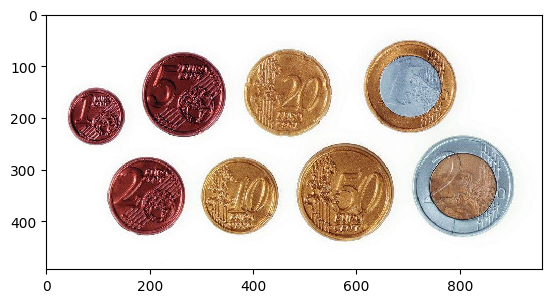

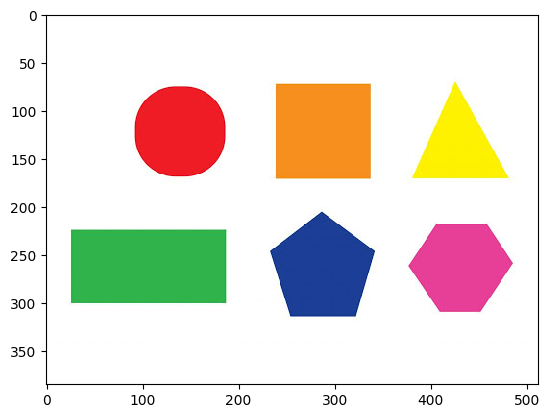

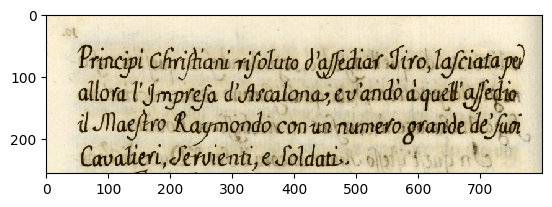

In [118]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

def load_image():
    images = {}
    for x in os.listdir("images"):
        images[x] = cv2.imread("images/" + x)
        temp = images[x][:,:,::-1]
        plt.imshow(temp, interpolation='nearest')
        plt.show()
    return images

def get_image(name):
    temp = images[name][:,:,::-1]
    return temp

def show_images(images: list[np.ndarray]) -> None:
    '''
    Display an image.

    Parameters:
        image (list[np.ndarray]): The image to display.
    '''
    fig = plt.figure(figsize=(20, 10))
    for i, row in enumerate(images):
        for j, (image, title) in enumerate(row):
            fig.add_subplot(len(images), len(row), i * len(row) + j + 1)
            # showing image
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(title)

def get_binary(image_name) -> np.ndarray:
    '''
    Convert an image to binary.

    Parameters:
        image (str): The image name to convert.

    Returns:
        np.ndarray: The binary image.
    '''
    custom_thresh = {
        "text.png": 140,
        "other": 240
    }
    image_to_process = images[image_name]
    gray = cv2.cvtColor(image_to_process, cv2.COLOR_BGR2GRAY)
    thresh: int
    if image_name in custom_thresh:
        thresh = custom_thresh[image_name]
    else:
        thresh = custom_thresh["other"]
    gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    (thresh, im_binary) = cv2.threshold(gray_blurred, thresh, 255, cv2.THRESH_BINARY_INV)
    return im_binary

images = load_image()


<b style="font-size:18px;">Exercise 1.0 - Connected Components</b>

Using opencv research how to use connectedComponents() function.  
Download image shapes.jpg and euro_coins.jpg. Apply the connected components function to segment the objects in the image. You can if you want also use the findContour() opencv method to extract the ROI (seperate shapes as new images). Vary the connectivity value (4 or 8) and document results. 

<i style="color:red">Do not forget to convert the image to binary, your objects should be white.</i>



*When I vary the connectivity value, I get different results, but only in the text image, because the connectivity value is the number of pixels considered to be connected to the current pixel. In the shape image, the connectivity value doesn't affect the result, as each object is separated by a large number of pixels. In the text image, the number of connected components is 129 with a connectivity value of 8 and 134 with a value of 4, because the text components are very close and two components can be separated by a single pixel, so it makes a difference whether digital pixels are taken into account or lateral pixels are ignored.*

[Euro_Coins.jpg] Number of connected components: 9
[shapes.jpg] Number of connected components: 7
[text.png] Number of connected components: 134


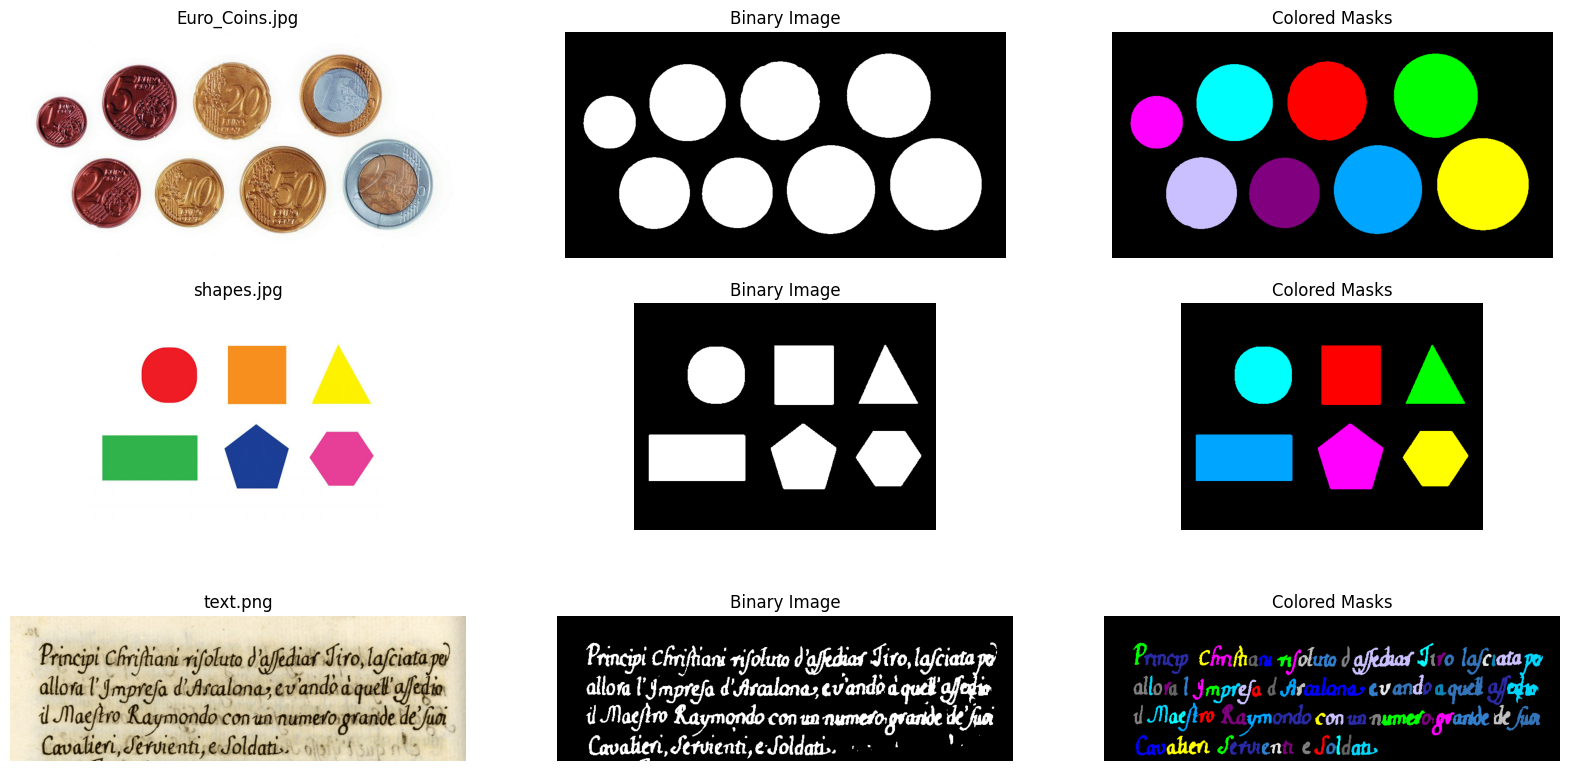

In [119]:
images_to_show_col = []

COLORS = {
    "RED": (255, 0, 0),
    "GREEN": (0, 255, 0),
    "BLUE": (0, 0, 255),
    "YELLOW": (255, 255, 0),
    "MAGENTA": (255, 0, 255),
    "CYAN": (0, 255, 255),
    "ORANGE": (255, 165, 0),
    "PINK": (255, 192, 203),
    "PURPLE": (128, 0, 128),
    "BROWN": (165, 42, 42),
    "GRAY": (128, 128, 128),
    "GOLD": (255, 215, 0),
    "SILVER": (192, 192, 192),
    "BRONZE": (205, 127, 50),
    "PLATINUM": (229, 228, 226),
    "COPPER": (184, 115, 51),
    "NICKEL": (184, 134, 11),
    "ZINC": (100, 100, 100),
}

for image_name in images.keys():
    images_to_show = []

    image_to_process = images[image_name]
    images_to_show.append((image_to_process, image_name))

    im_binary = get_binary(image_name)
    images_to_show.append((im_binary, "Binary Image"))

    num_labels, labels = cv2.connectedComponents(im_binary, connectivity=4)
    print(f"[{image_name}] Number of connected components: {num_labels}")

    # Create a colored mask for each connected component
    colored_mask = np.zeros((im_binary.shape[0], im_binary.shape[1], 3), dtype=np.uint8)  # Create a colored mask
    color_keys = list(COLORS.keys())
    min_size = 100
    for label in range(1, num_labels):  # Start from 1 to ignore the background
        component = labels == label
        if np.sum(component) > min_size:  # Check if the component is large enough to be a coin
            color = COLORS[color_keys[label % len(color_keys)]]  # Cycle through the color dictionary
            colored_mask[component] = color  # Assign 255 to pixels that belong to the current label
    images_to_show.append((colored_mask, "Colored Masks"))

    # images_to_show.append((mask, "Mask"))
    images_to_show_col.append(images_to_show)

show_images(images_to_show_col)

<b style="font-size:18px;">Exercise 1.1 - Dilation</b>

Download the image file handwritten text.png from VLE. Apply the opencv method for dilation (dilate()). Vary the dilation filter and compare results using histograms. What can you observe?

*When I vary the dilation, we can see that the text becomes bolder, as the white pixels are enlarged. The histogram shows that the number of white pixels increases with dilation.*

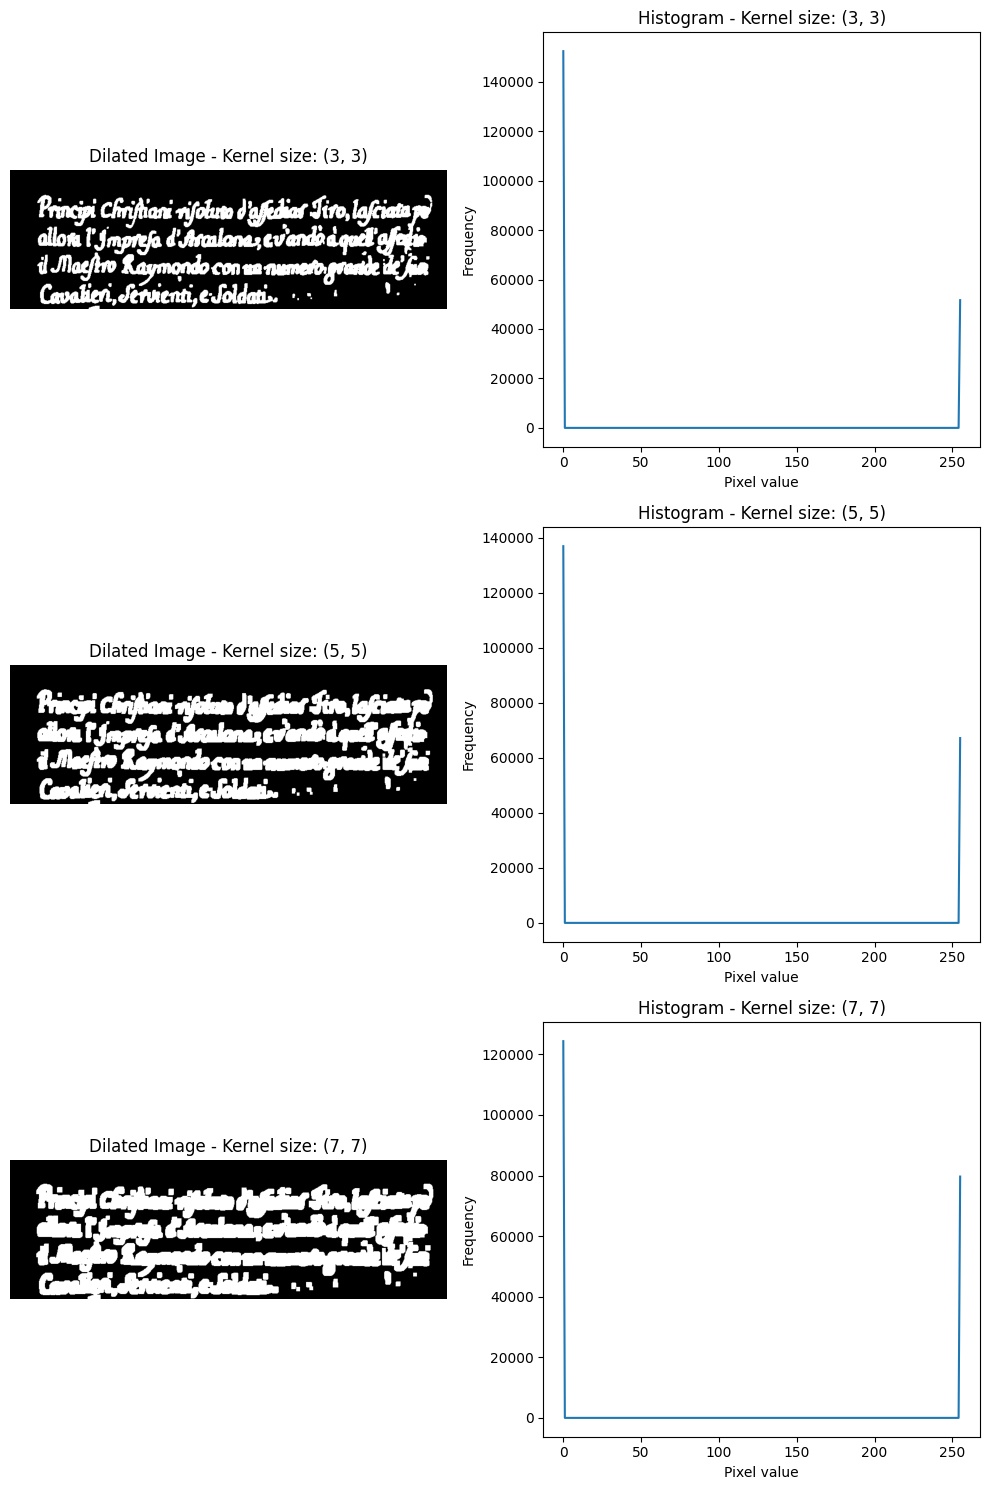

In [120]:
im_binary = get_binary(image_name)

# Define different kernels for dilation
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
kernels = [cv2.getStructuringElement(cv2.MORPH_RECT, size) for size in kernel_sizes]

# Apply dilation with different kernels
dilated_images = [cv2.dilate(im_binary, kernel) for kernel in kernels]

# Create a figure with a grid for each pair of dilated image and histogram
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(3, 2, height_ratios=[1, 1, 1])  # Adjust the number of rows based on the number of kernel sizes

for i, (dilated_image, kernel) in enumerate(zip(dilated_images, kernels)):
    # Display dilated image
    ax_image = fig.add_subplot(gs[i, 0])
    ax_image.imshow(dilated_image, cmap='gray')
    ax_image.set_title(f'Dilated Image - Kernel size: {kernel_sizes[i]}')
    ax_image.axis('off')

    # Calculate and plot histogram
    ax_hist = fig.add_subplot(gs[i, 1])
    hist = cv2.calcHist([dilated_image], [0], None, [256], [0, 256])
    ax_hist.plot(hist)
    ax_hist.set_title(f'Histogram - Kernel size: {kernel_sizes[i]}')
    ax_hist.set_xlabel('Pixel value')
    ax_hist.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<b style="font-size:18px;">Exercise 1.2 - Erosion</b>

Using the same text based image from the previous exercise apply the opencv method for erosion (erode()). Vary the erosion filter and compare results using histograms. What can you observe?

*When I vary the erosion, we can see that the text becomes thinner, as the white pixels are reduced. The histogram shows that the number of white pixels decreases with erosion.*

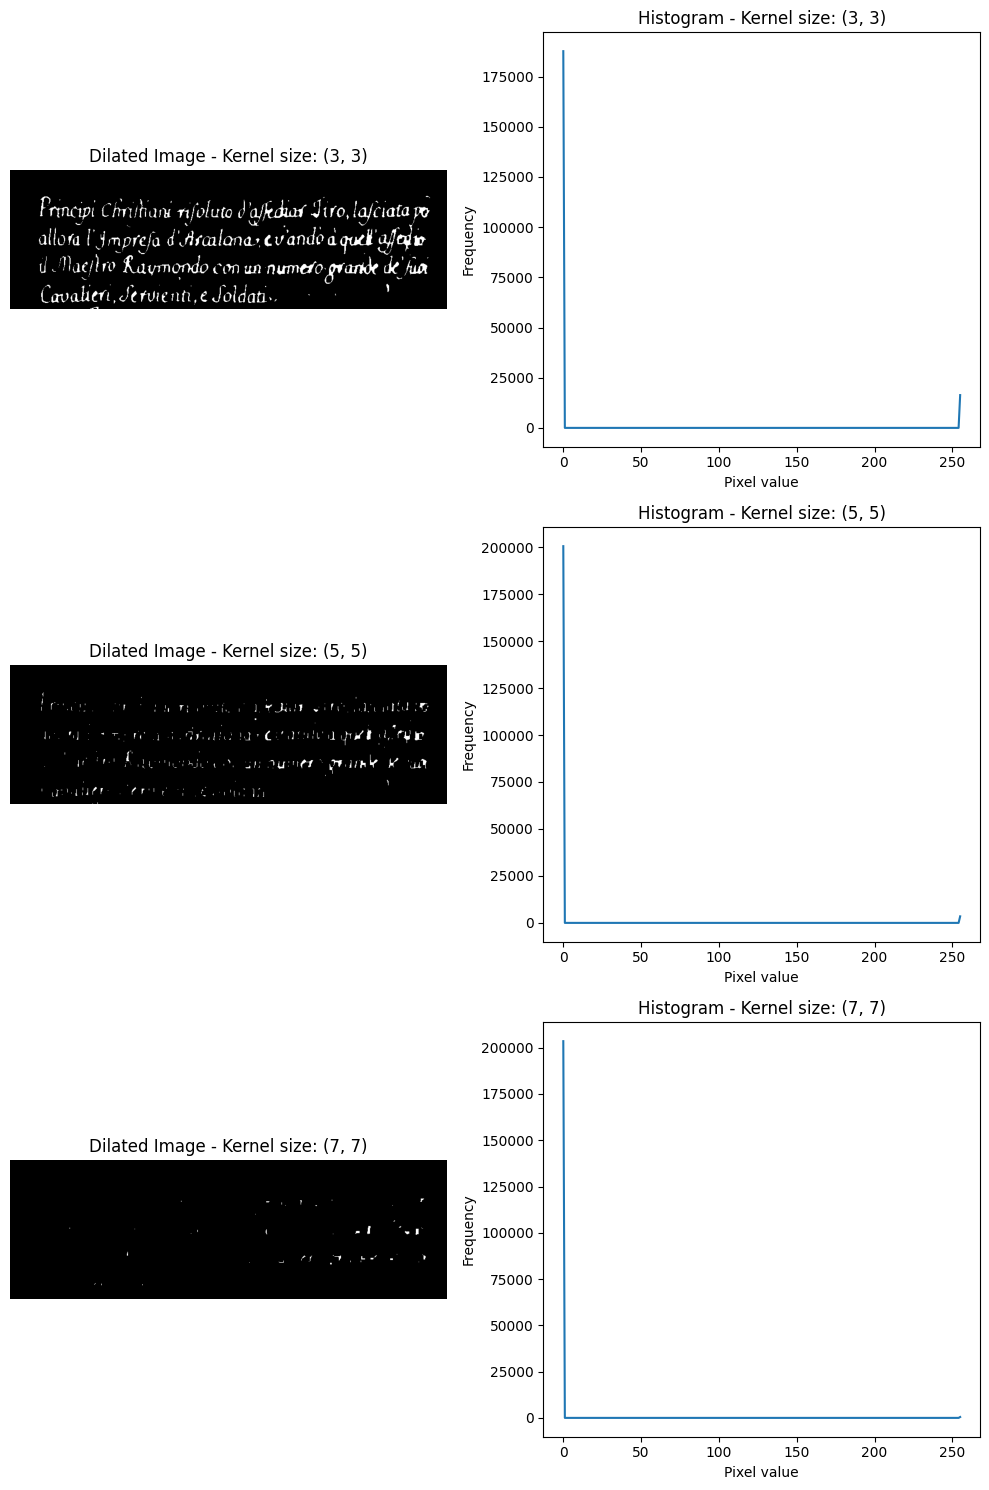

In [121]:
im_binary = get_binary(image_name)

# Define different kernels for dilation
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
kernels = [cv2.getStructuringElement(cv2.MORPH_RECT, size) for size in kernel_sizes]

# Apply dilation with different kernels
dilated_images = [cv2.erode(im_binary, kernel) for kernel in kernels]

# Create a figure with a grid for each pair of dilated image and histogram
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(3, 2, height_ratios=[1, 1, 1])  # Adjust the number of rows based on the number of kernel sizes

for i, (dilated_image, kernel) in enumerate(zip(dilated_images, kernels)):
    # Display dilated image
    ax_image = fig.add_subplot(gs[i, 0])
    ax_image.imshow(dilated_image, cmap='gray')
    ax_image.set_title(f'Dilated Image - Kernel size: {kernel_sizes[i]}')
    ax_image.axis('off')

    # Calculate and plot histogram
    ax_hist = fig.add_subplot(gs[i, 1])
    hist = cv2.calcHist([dilated_image], [0], None, [256], [0, 256])
    ax_hist.plot(hist)
    ax_hist.set_title(f'Histogram - Kernel size: {kernel_sizes[i]}')
    ax_hist.set_xlabel('Pixel value')
    ax_hist.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<b style="font-size:18px;">Exercise 1.3 - Opening</b>

Opening is an applied process of erosion followed by dilation. It is typically used to segment neck parts of shapes found within an image. 

It is also used in Text segmentation to seperate lines and words and sometimes characters.
Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


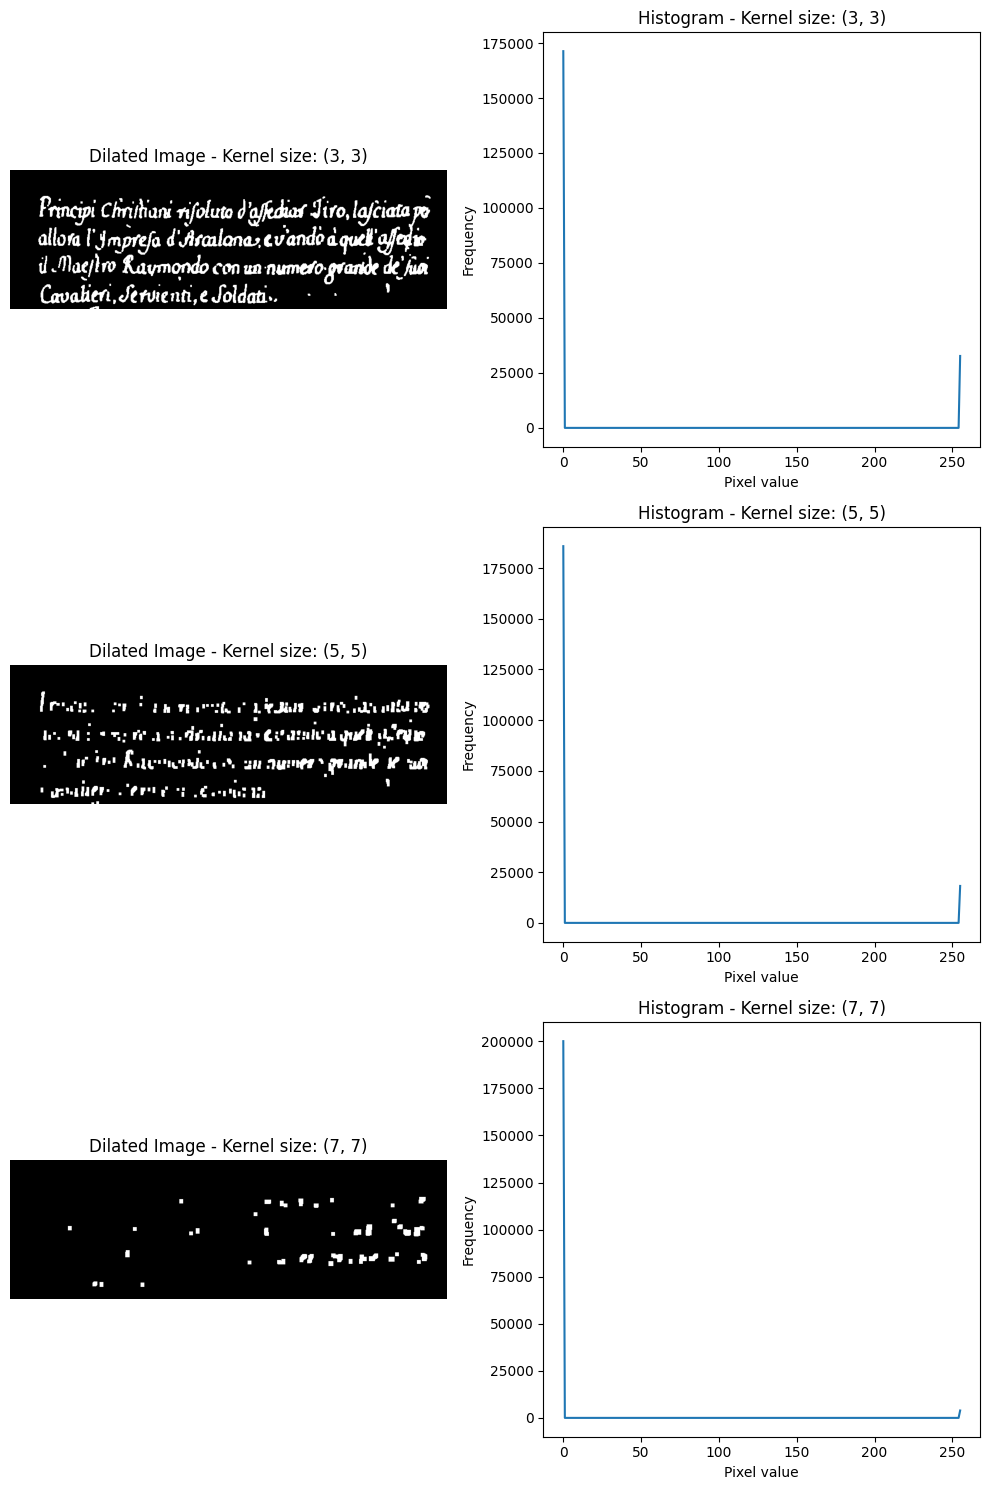

In [122]:
im_binary = get_binary(image_name)

# Define different kernels for dilation
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
kernels = [cv2.getStructuringElement(cv2.MORPH_RECT, size) for size in kernel_sizes]

# Apply dilation with different kernels
dilated_images = [cv2.dilate(cv2.erode(im_binary, kernel), kernel) for kernel in kernels]

# Create a figure with a grid for each pair of dilated image and histogram
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(3, 2, height_ratios=[1, 1, 1])  # Adjust the number of rows based on the number of kernel sizes

for i, (dilated_image, kernel) in enumerate(zip(dilated_images, kernels)):
    # Display dilated image
    ax_image = fig.add_subplot(gs[i, 0])
    ax_image.imshow(dilated_image, cmap='gray')
    ax_image.set_title(f'Dilated Image - Kernel size: {kernel_sizes[i]}')
    ax_image.axis('off')

    # Calculate and plot histogram
    ax_hist = fig.add_subplot(gs[i, 1])
    hist = cv2.calcHist([dilated_image], [0], None, [256], [0, 256])
    ax_hist.plot(hist)
    ax_hist.set_title(f'Histogram - Kernel size: {kernel_sizes[i]}')
    ax_hist.set_xlabel('Pixel value')
    ax_hist.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<b style="font-size:18px;">Exercise 1.4 - Closing</b>

Closing is an applied process of dilation followed by erosion. It is typically used to fill in shapes found within an image. It is also used in Text segmentation to reinforce eroded characters.

Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


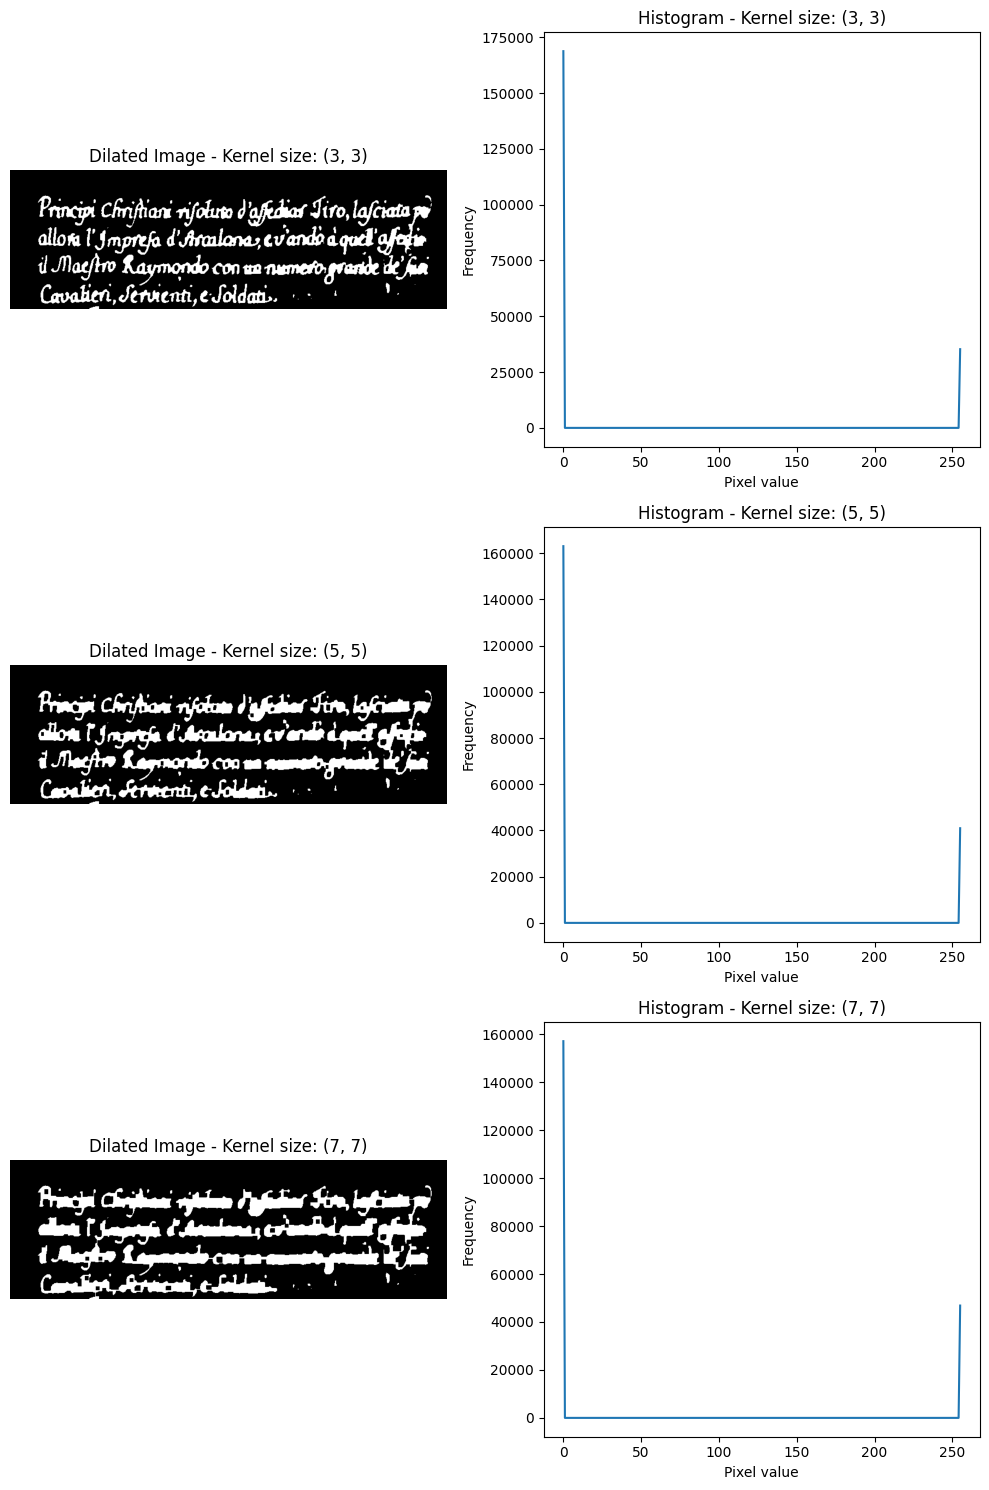

In [123]:
im_binary = get_binary(image_name)

# Define different kernels for dilation
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
kernels = [cv2.getStructuringElement(cv2.MORPH_RECT, size) for size in kernel_sizes]

# Apply dilation with different kernels
dilated_images = [cv2.erode(cv2.dilate(im_binary, kernel), kernel) for kernel in kernels]

# Create a figure with a grid for each pair of dilated image and histogram
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(3, 2, height_ratios=[1, 1, 1])  # Adjust the number of rows based on the number of kernel sizes

for i, (dilated_image, kernel) in enumerate(zip(dilated_images, kernels)):
    # Display dilated image
    ax_image = fig.add_subplot(gs[i, 0])
    ax_image.imshow(dilated_image, cmap='gray')
    ax_image.set_title(f'Dilated Image - Kernel size: {kernel_sizes[i]}')
    ax_image.axis('off')

    # Calculate and plot histogram
    ax_hist = fig.add_subplot(gs[i, 1])
    hist = cv2.calcHist([dilated_image], [0], None, [256], [0, 256])
    ax_hist.plot(hist)
    ax_hist.set_title(f'Histogram - Kernel size: {kernel_sizes[i]}')
    ax_hist.set_xlabel('Pixel value')
    ax_hist.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

Apply any of the morphological techniques used in the previous exercises to extract the text from the image. The extracted texts do not have to be perfect. 

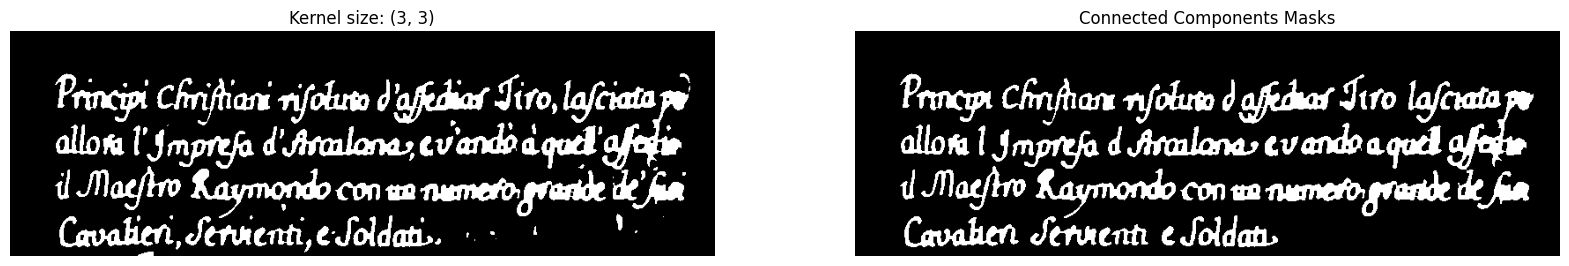

In [124]:
im_binary = get_binary(image_name)

# Define different kernels for dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply dilation with different kernels
dilated_images = cv2.erode(cv2.dilate(im_binary, kernel), kernel)

images_to_show_col = []
images_to_show = []
images_to_show.append((dilated_images, f'Kernel size: (3, 3)'))

num_labels, labels = cv2.connectedComponents(dilated_images, connectivity=8)

# Create a colored mask for each connected component
colored_mask = np.zeros((im_binary.shape[0], im_binary.shape[1], 3), dtype=np.uint8)  # Create a colored mask
color_keys = list(COLORS.keys())
min_size = 100
for label in range(1, num_labels):  # Start from 1 to ignore the background
    component = labels == label
    if np.sum(component) > min_size:  # Check if the component is large enough to be a coin
        color = COLORS[color_keys[label % len(color_keys)]]  # Cycle through the color dictionary
        colored_mask[component] = 255  # Assign 255 to pixels that belong to the current label
images_to_show.append((colored_mask, "Connected Components Masks"))
images_to_show_col.append(images_to_show)

show_images(images_to_show_col)
